In [14]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pd.read_csv("/mnt/c/Users/andre/OneDrive/Escritorio/DATA_ENGINEER/Proyectos-udemy-py/aplicacion 3/reviews-graficos/reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [34]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).count()
day_average.head()


,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


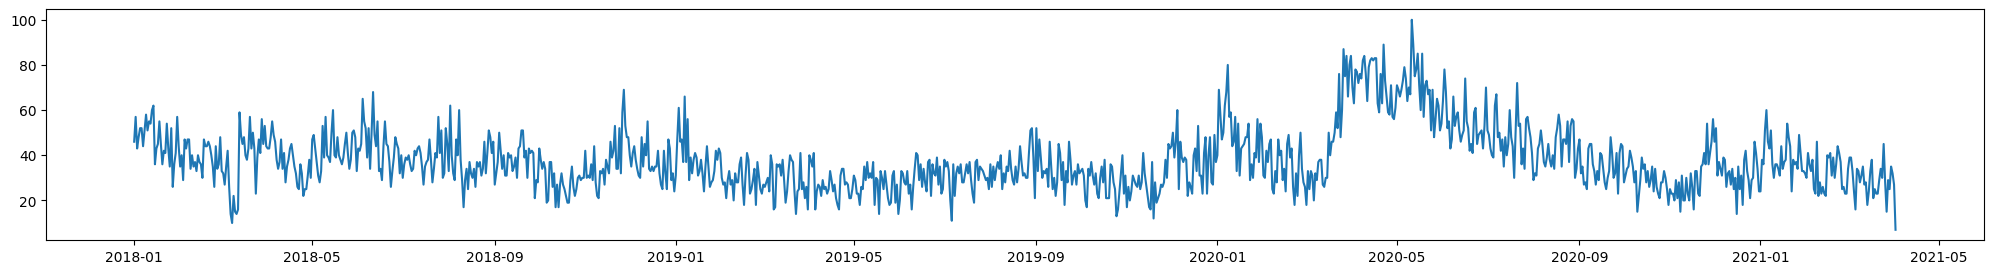

In [35]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

## Promedio de clasificacion por mes


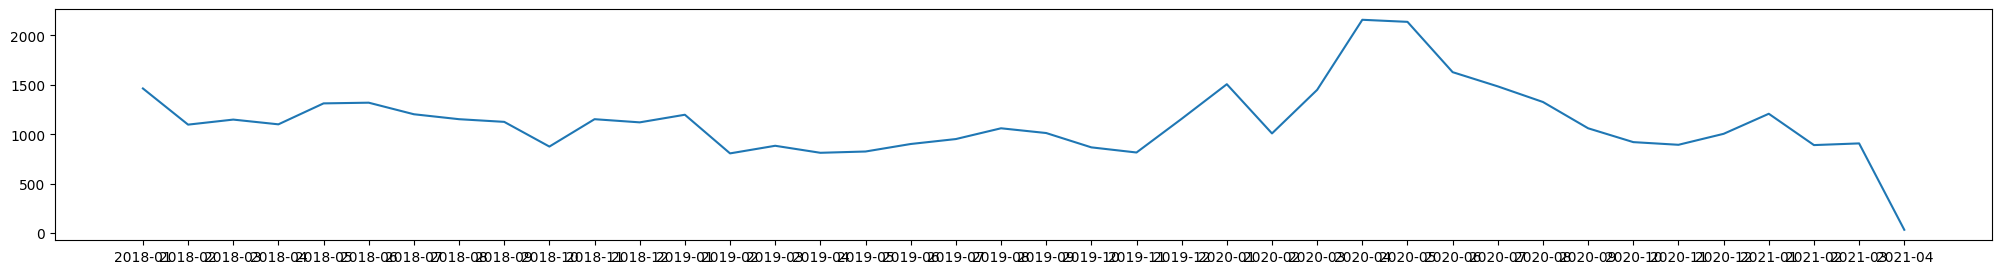

In [49]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).count()

plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])

In [50]:
month_average.head()

,Course Name,Timestamp,Rating,Comment,Day,Week
Month,,,,,,
2018-01,1464,1464,1464,339,1464,1464
2018-02,1098,1098,1098,246,1098,1098
2018-03,1149,1149,1149,231,1149,1149
2018-04,1101,1101,1101,223,1101,1101
2018-05,1313,1313,1313,179,1313,1313


#### Promedio de clasificacion por mes por curso

<Axes: xlabel='Month'>

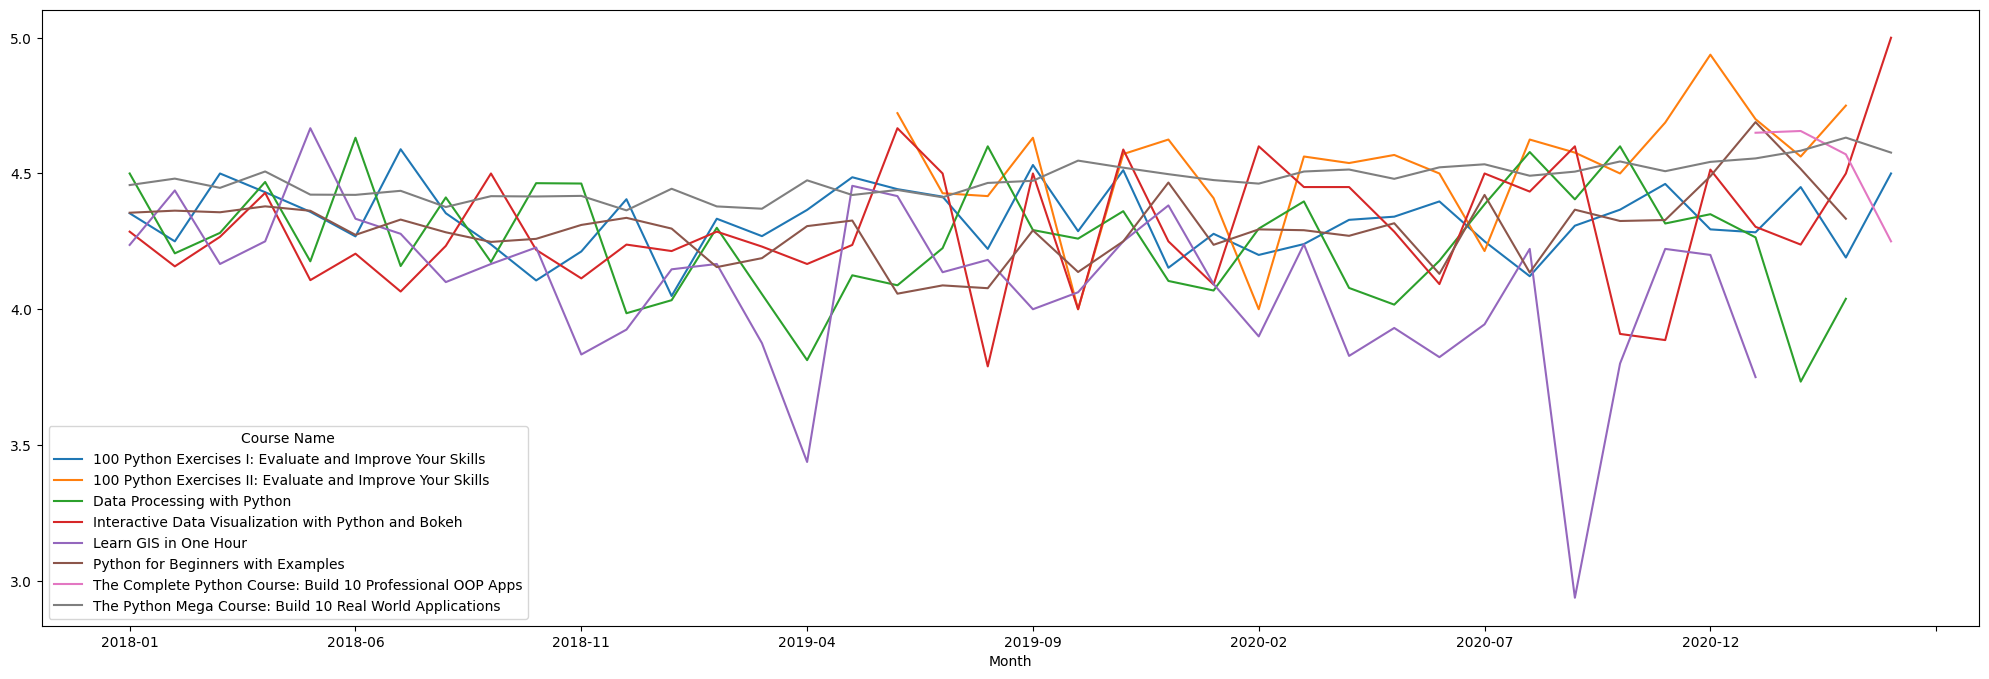

In [60]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()

month_average_crs.plot(figsize=(25,8))